<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
درآمد
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این تمرین قصد داریم درخت تصمیمی بسازیم که قادر باشد با دریافت یک سری ویژگی‌های شخصی و شغلی از شهروندان آمریکایی پیش‌بینی کند آیا شخص درآمد سالانه‌ی بالای ۵۰ هزار دلار خواهد داشت یا خیر. مجموعه‌داده‌ی مورداستفاده و صورت مسئله بسیار خوش‌تعریف است، با این حال جهت پیش‌پردازش مناسب ویژگی‌ها و همچنین دست‌یابی به یک مدل  با عملکرد بالا نیاز است از تکنیک‌های مختلف مهندسی ویژگی و فوت‌و‌فن‌های مرتبط با درخت تصمیم که در درسنامه‌ها آموخته‌اید استفاده کنید. بهره‌گیری از این تکنیک‌ها جهت مواجهه با چالش‌های عملی می‌تواند به‌خوبی شما را برای استفاده از این مدل در دنیای واقعی آماده کند.‌
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    هر نمونه از این مجموعه‌داده با ویژگی‌هایی که در جدول زیر شرح داده شده همراه است. ستون <code>income</code> متغیر هدف مسئله است که درآمد شخص را نشان می‌دهد. 
</font>
</p>
<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|age|سن|
|workclass|یک عبارت کلی که نشان‌دهنده‌ی وضعیت شغلی فرد است.|
|fnlwgt|وزن نهایی، به عبارت دیگر تعداد افرادی که سرشماری باور دارد این ردیف بازنمایی می‌کند (نماینده‌ی آنهاست). |
|education|بیشترین سطح تحصیلات فرد |
|education.num|بیشترین سطح تحصیلات فرد به شکل عددی |
|marital.status|وضعیت تاهل فرد. توجه شود که <code>Married-­civ-­spouse</code> به معنی همسر غیرنظامی و <code>Married-­AF-­spouse</code> به معنی همسر نظامی است.|
|occupation|نوع کلی شغل یک فرد |
|relationship|رابطه‌ی این فرد با دیگران، به عنوان مثال همسر (<code>Husband</code>). هر داده تنها دارای یک رابطه است. |
|race|نژاد |
|sex| جنسیت بیولوژیکی فرد |
|capital.gain|سود سرمایه‌ی فرد  |
|capital.loss| زیان سرمایه‌ی فرد |
|hours.per.week| ساعت‌هایی که فرد گزارش داده در یک هفته کار می‌کند. |
|native.country| سرزمین مادری |
|income|درآمد، کمتر یا مساوی ۵۰ هزار دلار (<code dir=ltr><=50K</code>) یا بیشتر از آن (<code dir=ltr>>50K</code>) |

</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزشی را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [3]:
test_data =pd.read_csv('test.csv')
test_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,31,Private,176711,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,38,United-States
1,40,Private,120277,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States
2,43,Private,299197,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
3,70,Self-emp-inc,188260,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,16,United-States
4,51,Private,254211,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7159,37,Self-emp-not-inc,75050,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States
7160,36,Private,156780,HS-grad,9,Never-married,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,?
7161,34,Private,381153,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
7162,59,Private,294395,Masters,14,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید. توجه داشته باشید که انتخاب شما در بخش بعدی یعنی مدل‌سازی می‌تواند مراحلی که در این بخش طی می‌کنید را تحت تاثیر قرار دهد. بنابراین پیشنهاد می‌کنیم مواردی همچون مدیریت مقادیر گم‌شده، ویژگی‌های دسته‌ای و غیره را پس از مطالعه‌ی بخش بعد انجام دهید.
    <br>
    تکنیک‌هایی که در این بخش استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [4]:
train_data=train_data.replace('?',np.nan)
test_data=test_data.replace('?',np.nan)
train_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,NaN,148657,Preschool,1,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,NaN,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [5]:
train_data.isna().sum()

age                  0
workclass         1429
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1434
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     437
income               0
dtype: int64

In [6]:
test_data.isna().sum()

age                 0
workclass         387
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        389
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    138
dtype: int64

In [7]:
#Filling missing data by Mode method
missing_columns=train_data.columns[train_data.isna().sum()>0]
for i in missing_columns:

    train_data[i]=train_data[i].fillna(train_data[i].mode()[0])
    test_data[i]=test_data[i].fillna(test_data[i].mode()[0])

train_data


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,Private,148657,Preschool,1,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [8]:
NAN_number=train_data.isna().sum()
Duplicated_number=train_data.duplicated().sum()
print(NAN_number,'Nan_number','Duplicated_number = ',Duplicated_number)


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64 Nan_number Duplicated_number =  12


In [9]:
train_data=train_data.drop_duplicates()
train_data.shape

(24988, 15)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24988 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24988 non-null  int64 
 1   workclass       24988 non-null  object
 2   fnlwgt          24988 non-null  int64 
 3   education       24988 non-null  object
 4   education.num   24988 non-null  int64 
 5   marital.status  24988 non-null  object
 6   occupation      24988 non-null  object
 7   relationship    24988 non-null  object
 8   race            24988 non-null  object
 9   sex             24988 non-null  object
 10  capital.gain    24988 non-null  int64 
 11  capital.loss    24988 non-null  int64 
 12  hours.per.week  24988 non-null  int64 
 13  native.country  24988 non-null  object
 14  income          24988 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB


In [12]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [10]:
#outlaiyer
from scipy import stats
numerica_col=train_data.select_dtypes(include=[np.number])
df_c=train_data[(np.abs(stats.zscore(numerica_col))<3).all(axis=1)]
train_data.shape

(24988, 15)

In [11]:
from sklearn.preprocessing import LabelEncoder

categorica_col=train_data.iloc[:,:-1].select_dtypes(include=['object']).columns.to_list()
categorica_col
for j in categorica_col:
    train_data[j]=LabelEncoder().fit_transform(train_data[j])
    test_data[j]=LabelEncoder().fit_transform(test_data[j])
    
train_data['income']=train_data['income'].replace({'<=50K':0 ,'>50K':1})

train_data

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\2512655978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[j]=LabelEncoder().fit_transform(train_data[j])
C:\Users\USER\AppData\Local\Temp\ipykernel_8240\2512655978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[j]=LabelEncoder().fit_transform(train_data[j])
C:\Users\USER\AppData\Local\Temp\ipykernel_8240\2512655978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,5,223881,14,15,2,9,0,4,1,99999,0,70,37,1
1,30,3,149118,11,9,0,2,1,4,0,0,0,40,37,0
2,46,3,109209,15,10,2,0,0,4,1,0,0,40,37,1
3,32,3,229566,8,11,2,7,0,4,1,0,0,60,37,1
4,54,3,148657,13,1,2,9,5,4,0,0,0,40,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,3,130834,15,10,4,0,1,4,0,0,0,40,37,0
24996,31,1,33124,9,13,4,9,1,4,0,0,0,50,37,0
24997,38,0,190895,9,13,2,9,0,4,1,0,0,40,37,1
24998,23,3,420973,9,13,4,9,1,4,0,0,0,40,37,0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24988 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             24988 non-null  int64
 1   workclass       24988 non-null  int32
 2   fnlwgt          24988 non-null  int64
 3   education       24988 non-null  int32
 4   education.num   24988 non-null  int64
 5   marital.status  24988 non-null  int32
 6   occupation      24988 non-null  int32
 7   relationship    24988 non-null  int32
 8   race            24988 non-null  int32
 9   sex             24988 non-null  int32
 10  capital.gain    24988 non-null  int64
 11  capital.loss    24988 non-null  int64
 12  hours.per.week  24988 non-null  int64
 13  native.country  24988 non-null  int32
 14  income          24988 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.3 MB


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data.iloc[:,:-1]=scaler.fit_transform(train_data.iloc[:,:-1])
test_data.iloc[:,:]=scaler.transform(test_data.iloc[:,:])

train_data

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\383522327.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.31506849 0.17808219 0.39726027 ... 0.28767123 0.08219178 0.5890411 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.iloc[:,:-1]=scaler.fit_transform(train_data.iloc[:,:-1])
C:\Users\USER\AppData\Local\Temp\ipykernel_8240\383522327.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.71428571 0.42857143 0.42857143 ... 0.         0.42857143 0.42857143]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  train_data.iloc[:,:-1]=scaler.fit_transform(train_data.iloc[:,:-1])
C:\Users\USER\AppData\Local\Temp\ipykernel_8240\383522327.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. V

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0.315068,0.714286,0.143706,0.933333,0.933333,0.333333,0.692308,0.0,1.0,1,1.0,0.0,0.704082,0.948718,1
1,0.178082,0.428571,0.092931,0.733333,0.533333,0.000000,0.153846,0.2,1.0,0,0.0,0.0,0.397959,0.948718,0
2,0.397260,0.428571,0.065826,1.000000,0.600000,0.333333,0.000000,0.0,1.0,1,0.0,0.0,0.397959,0.948718,1
3,0.205479,0.428571,0.147567,0.533333,0.666667,0.333333,0.538462,0.0,1.0,1,0.0,0.0,0.602041,0.948718,1
4,0.506849,0.428571,0.092618,0.866667,0.000000,0.333333,0.692308,1.0,1.0,0,0.0,0.0,0.397959,0.615385,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.315068,0.428571,0.080513,1.000000,0.600000,0.666667,0.000000,0.2,1.0,0,0.0,0.0,0.397959,0.948718,0
24996,0.191781,0.142857,0.014153,0.600000,0.800000,0.666667,0.692308,0.2,1.0,0,0.0,0.0,0.500000,0.948718,0
24997,0.287671,0.000000,0.121304,0.600000,0.800000,0.333333,0.692308,0.0,1.0,1,0.0,0.0,0.397959,0.948718,1
24998,0.082192,0.428571,0.277562,0.600000,0.800000,0.666667,0.692308,0.2,1.0,0,0.0,0.0,0.397959,0.948718,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند. در این تمرین انتخاب کتابخانه‌ای که درخت تصمیم را در اختیارتان بگذارد به عهده‌ی خود شماست. می‌توانید همچون همیشه از کتابخانه‌ی <code>scikit-learn</code> استفاده کنید اما توجه داشته باشید که درخت تصمیم این کتابخانه از قابلیت‌های مهمی مثل مدیریت مستقیم مقادیر گم‌شده و ویژگی‌های دسته‌ای پشتیبانی نمی‌کند و نیاز خواهید داشت که مراحل پیش‌پردازش مختلفی را انجام دهید. اما پیشنهاد بهتر این است که با توجه به توضیحاتی که در ادامه خواهیم داد از کتابخانه‌ی <code>H2O</code> استفاده کنید که از قابلیت‌های ذکرشده پشتیبانی می‌کند و نیازی به طی کردن مراحل اضافی نیست (البته معمولاً عملکرد درخت تصمیم این کتابخانه هم بهتر از درخت تصمیم <code>scikit-learn</code> است). با این حال ما مقدار آستانه‌ی پاس شدن این تمرین را به‌گونه‌ای تنظیم کرده‌ایم که متعادل باشد و با هر دو روش بتوانید امتیاز موردنظر را کسب کنید. حتی می‌توانید خفن‌تر (😎) عمل کرده و با هرکدام از کتابخانه‌ها درخت تصمیمی بسازید و عملکرد آن‌ها را مقایسه کنید. 
</font>
</p>

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    استفاده از <code>scikit-learn</code>
</font>
</h3>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    به منظور استفاده از درخت تصمیم برای مسائل دسته‌بندی می‌توانید از <code>DecisionTreeClassifier</code> موجود در کتابخانه‌ی <code>scikit-learn</code> استفاده کنید. نحوه‌ی آموزش مدل و پیش‌بینی برای نمونه‌های جدید همچون تمام مدل‌های این کتابخانه است، اما برخی پارامترها و آرگومان‌های بسیار کاربردی این کلاس در جدول زیر شرح داده شده‌اند. جهت بررسی پارامترها و توضیحات بیشتر می‌توانید از <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier" target="__blank">این لینک</a>، سند اصلی آن را مطالعه کنید.
</font>
</p>

<center>
<p dir=ltr style="direction: ltr; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    <code dir=ltr>from sklearn.tree import DecisionTreeClassifier</code>
    <br>
    <code dir=ltr>clf = DecisionTreeClassifier()</code>
</font>
</p>
</center>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|پارامتر|توضیحات|مقادیر ممکن|مقدار پیش‌فرض|
|:------:|:---:|:---:|:---:|
|<code>criterion</code>|معیار ارزیابی تفکیک (معیار ناخالصی یا بهره اطلاعاتی)|<code>"gini"</code>، <code>"entropy"</code> یا <code>"log_loss"</code>|<code>"gini"</code>|
|<code>max_depth</code>|حداکثر عمق درخت|عدد <code>int</code>|<code>None</code>|
|<code>min_samples_split</code>|حداقل نمونه‌ها جهت تفکیک یک گره‌ی داخلی|عدد <code>int</code> (تعداد) یا <code>float</code> (درصد)|<code>2</code>|
|<code>min_samples_leaf</code>|حداقل نمونه‌های یک برگ. یک گره تنها در صورتی تفکیک می‌یابد که هرکدام از شاخه‌های راست و چپ آن حداقل شامل این تعداد نمونه باشد|عدد <code>int</code> (تعداد) یا <code>float</code> (درصد)|<code>1</code>|
|<code>max_features</code>|تعداد ویژگی‌هایی که در هنگام جستجوی بهترین تفکیک بررسی می‌شوند|عدد <code>int</code> (تعداد)، <code>float</code> (درصد)، ، <code>"sqrt"</code> (جذر)، <code>"log2"</code> (لگاریتم در مبنای ۲) یا <code>None</code> (تمام ویژگی‌ها)|<code>None</code>|
|<code>min_impurity_decrease</code>|یک گره هنگامی تفکیک می‌شود که آن تفکیک باعث کاهش ناخالصی بیشتر یا مساوی این مقدار شود|عدد <code>float</code>|<code>0.0</code>|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    <b>نکته:</b>
    پارامتر کاربردی دیگری به نام <code>ccp_alpha</code> وجود دارد که به منظور پس‌هرس درخت تصمیم با روش Minimal Cost-Complexity استفاده می‌شود. از آنجا که شرح این تکنیک خارج از بحث این فصل است، ضرورتی بر استفاده از آن تعریف نشده است. اما در صورت علاقه می‌توانید برای مطالعه‌ی این روش جذاب به بخش <a href="https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning" target="__blank">معرفی آن</a> در <code>scikit-learn</code> یا فصل سوم کتاب <i>Classification and Regression Trees</i> نوشته‌ی <i>Leo Breiman</i> مراجعه کرده و یا به شکلی ساده‌تر و جذاب‌تر <a href="https://youtu.be/D0efHEJsfHo" target="__blank">این ویدیو</a> را از <i>StatQuest</i> مشاهده کنید.  
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    اگر مدل را <code>clf</code> بنامیم، پس از آموزش آن می‌توانید به کمک توابع یا متغیرهای زیر، برخی ویژگی‌های مهم درخت تصمیم را مورد بررسی قرار دهید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|پارامتر|توضیحات|
|:------:|:---:|
| <code dir=ltr>clf.get_depth()</code> | عمق درخت |
| <code dir=ltr>clf.get_n_leaves()</code> | تعداد برگ‌های درخت |
| <code dir=ltr>clf.feature_names_in_</code> | ویژگی‌های ورودی |
| <code dir=ltr>clf.feature_importances_</code> | اهمیت هر ویژگی طبق معیار ناخالصی |
    
</font>
</div>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    همچنین طبق کد زیر می‌توانید به کمک تابع <code>plot_tree</code> درخت تصمیم خود را ترسیم کنید. البته در صورتی‌که درخت حاصل بزرگ باشد ترسیم آن چندان جالب به نظر نخواهد رسید.
</font>
</p>

<center>
<p dir=ltr style="direction: ltr; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    <code dir=ltr>from sklearn import tree</code>
    <br>
    <code dir=ltr>tree.plot_tree(clf)</code>
</font>
</p>
</center>

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    استفاده از <code>H2O</code>
</font>
</h3>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در کتابخانه‌ی <code>H2O</code> درخت تصمیم به‌صورت مشخص پیاده‌سازی نشده اما به کمک ترفندی که شرح خواهیم داد می‌توانید به یک درخت تصمیم دست یابید. در این کتابخانه مدل‌های حرفه‌ای‌تری پیاده‌سازی شده که در واقع اساس آن‌ها درخت تصمیم است. یکی از این مدل‌ها «<i>جنگل تصادفی</i>» نام دارد که در این کتابخانه با نام <code>H2ORandomForestEstimator</code> در دسترس است و در فصل یادگیری تجمعی کاملاً با ساختار آن آشنا خواهید شد. این مدل در واقع متشکل از تعداد زیادی درخت تصمیم است. بنابراین اگر ما یک جنگل تصادفی بسازیم که تنها شامل یک درخت باشد  در واقع مدل همانند یک درخت تصمیم عمل خواهد کرد. البته نیاز است به شکل زیر برخی از پارامترهای آن را به گونه‌ای مقداردهی کنیم که رفتاری شبیه به درخت تصمیم داشته باشد.
</font>
</p>

<center>
<p dir=ltr style="direction: ltr; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<code>from h2o.estimators import H2ORandomForestEstimator</code>
<br>
<code>model = H2ORandomForestEstimator(ntrees=1, sample_rate=1)</code>
</font>
</p>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برخی از پارامترهای کاربردی این کلاس نیز در جدول زیر معرفی و شرح داده شده است. جهت بررسی پارامترها و توضیحات بیشتر می‌توانید از <a href="https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html" target="__blank">این لینک</a>، سند اصلی آن را مطالعه کنید.
</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|پارامتر|توضیحات|مقادیر ممکن|مقدار پیش‌فرض|
|:------:|:-----:|:---:|:---:|
|<code>mtries</code>|تعداد ویژگی‌هایی که به‌صورت تصادفی در هر سطح برای جستجوی بهترین تفکیک استفاده می‌شود| <code dir=ltr>-1</code> برای جذر، <code dir=ltr>-2</code> برای تمام ویژگی‌ها یا عدد بزرگتر یا مساوی <code>1</code> |<code dir=ltr>-1</code>|
|<code>max_depth</code>|حداکثر عمق درخت|عدد <code>int</code>|<code>20</code>|
|<code>min_rows</code>|حداقل نمونه‌های یک برگ. یک گره تنها در صورتی تفکیک می‌یابد که هرکدام از شاخه‌های راست و چپ آن حداقل شامل این تعداد نمونه باشد|عدد <code>int</code>|<code>1</code>|
|<code>min_split_improvement</code>|یک گره هنگامی تفکیک می‌شود که کاهش مربعات خطا حداقل به این میزان بهبود یابد|عدد کوچک (پیشنهاد می‌شود در بازه‌ی <code>1e-10</code> تا <code>1e-3</code> باشد)|<code>1e-05</code>|
|<code>categorical_encoding</code>|رویکرد مدیریت ویژگی‌های دسته‌ای|<code>"auto"</code> (به‌صورت پیش‌فرض معادل <code>"enum"</code>)، <code>"enum"</code> (پشتیبانی مستقیم از ویژگی دسته‌ای)، <code>"one_hot_explicit"</code> (کدگذاری one-hot)،  <code>"binary"</code> (کدگذاری باینری)، <code>"label_encoder"</code> (برچسب‌گذاری) و غیره|<code>"auto"</code>|
|<code>balance_classes</code>|متوازن‌سازی مجموعه‌داده به کمک نمونه‌افزایی کلاس اقلیت|<code>True</code> یا <code>False</code>|<code>False</code>|
|<code>nfolds</code>|تعداد قطعه‌ها در اعتبارسنجی متقاطع (cross-validation)|عدد <code>int</code>|<code>0</code>|
    
</font>
</div>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای استفاده از <code>H2O</code> پیش از هرچیز نیاز است مراحل راه‌اندازی آن را که در درسنامه‌ی مربوط به این کتابخانه شرح داده شد اجرا کرده باشید و همچنین دیتافریم‌های خود را به <code>H2OFrame</code> تبدیل کرده باشید. پس از آن می‌توانید به کمک مدل معرفی‌شده در بالا پارامترهای موردنظر خود را مقداردهی کنید. سپس جهت آموزش مدل نیاز است تابع <code dir=ltr>fit()</code> را با سه آرگومان مهم زیر صدا بزنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|پارامتر|توضیحات|
|:------:|:-----:|
|<code>x</code>| لیستی شامل نام ستون‌های ورودی (ویژگی‌ها) |
|<code>y</code>| نام ستون متغیر هدف |
|<code>training_frame</code>| داده‌های آموزشی از جنس <code>H2OFrame</code> |
|<code>validation_frame</code>| داده‌های اعتبارسنجی از جنس <code>H2OFrame</code> (دلخواه)|

    
</font>
</div>
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    جهت پیش‌بینی نیز می‌توانید <code>H2OFrame</code> موردنظر خود را به تابع <code dir=ltr>predict()</code> بدهید تا مدل شروع به پیش‌بینی متغیر هدف برای نمونه‌های موردنظر شما کند. توجه داشته باشید که اگر قصد دارید مقادیر پیش‌بینی‌شده را به یک دیتافریم <code>pandas</code> تبدیل کنید می‌توانید از تابع <code dir=ltr>as_data_frame()</code> استفاده کنید. مقادیر پیش‌بینی‌شده در ستونی به نام <code>predict</code> در دیتافریم به‌دست‌آمده ذخیره شده‌اند. 
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    اکنون وقت آن رسیده که با توجه به کتابخانه‌ی انتخابی، مدل را آموزش دهید.
</font>
</p>

In [13]:
# Decision Tree Method
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X=train_data.drop(['income'],axis=1)
Y=train_data['income']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

clf=DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=2,min_samples_leaf=1 ,random_state=42)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>F1-score</code> نام دارد و کلاس مثبت (<code>pos_label</code>) را معادل <code dir=ltr>>50K</code> فرض کرده‌ایم، به این معنی که مدل شما باید برای پیش‌بینی درست افراد پردرآمد عملکرد مناسبی داشته باشد.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید و طبق نتایج به‌دست‌آمده پارامترهای مدل خود را بهتر تنظیم کنید.
</font>
</p>

In [14]:
# evaluate model of Clf
from sklearn.metrics import f1_score, classification_report, confusion_matrix

f1=f1_score(y_test,y_pred,average='weighted')
classification_report=classification_report(y_test,y_pred)
print('F1_Score (weighted) =' , f1)

print(classification_report)

cm=confusion_matrix(y_test,y_pred)

print('Confision_Matrix')
print(cm)

F1_Score (weighted) = 0.82781753448316
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3840
           1       0.74      0.48      0.58      1158

    accuracy                           0.84      4998
   macro avg       0.80      0.71      0.74      4998
weighted avg       0.83      0.84      0.83      4998

Confision_Matrix
[[3648  192]
 [ 603  555]]


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>66</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدل‌سازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در مجموعه‌ی آزمون استفاده کنید و نتایج را در یک دیتافریم تک‌ستونه با نام <code>submission</code> و در قالب زیر آماده کنید. توجه داشته باشید که ترتیب پیش‌بینی شما اهمیت دارد یعنی به عنوان مثال پیش‌بینی مدل برای نمونه‌ی آزمون <code>m</code>ام را باید در ردیف <code>m</code>ام این دیتافریم ذخیره کنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|income|پیش‌بینی مدل شما (مقدار <code dir=ltr>>50K</code> یا <code dir=ltr><=50K</code>)|
    
</font>
</div>
</center>

In [15]:
# predict test samples
prediction_t =clf.predict(test_data)
submission = pd.DataFrame({'Cancel':prediction_t})
submission=submission.replace({1: '>50k',0:'<=50k'})
submission
submission

,Cancel
0,<=50k
1,<=50k
2,<=50k
3,<=50k
4,>50k
...,...
7159,<=50k
7160,<=50k
7161,<=50k
7162,<=50k


[Text(0.5, 0.875, 'x[7] <= 0.1\ngini = 0.369\nsamples = 19990\nvalue = [15103, 4887]'),
 Text(0.25, 0.625, 'x[4] <= 0.7\ngini = 0.495\nsamples = 8125\nvalue = [4452, 3673]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.051\ngini = 0.439\nsamples = 5433\nvalue = [3666.0, 1767.0]'),
 Text(0.0625, 0.125, 'gini = 0.413\nsamples = 5163\nvalue = [3660, 1503]'),
 Text(0.1875, 0.125, 'gini = 0.043\nsamples = 270\nvalue = [6, 264]'),
 Text(0.375, 0.375, 'x[10] <= 0.051\ngini = 0.413\nsamples = 2692\nvalue = [786, 1906]'),
 Text(0.3125, 0.125, 'gini = 0.449\nsamples = 2301\nvalue = [784, 1517]'),
 Text(0.4375, 0.125, 'gini = 0.01\nsamples = 391\nvalue = [2, 389]'),
 Text(0.75, 0.625, 'x[10] <= 0.071\ngini = 0.184\nsamples = 11865\nvalue = [10651, 1214]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 0.9\ngini = 0.148\nsamples = 11570\nvalue = [10641.0, 929.0]'),
 Text(0.5625, 0.125, 'gini = 0.096\nsamples = 10688\nvalue = [10145, 543]'),
 Text(0.6875, 0.125, 'gin

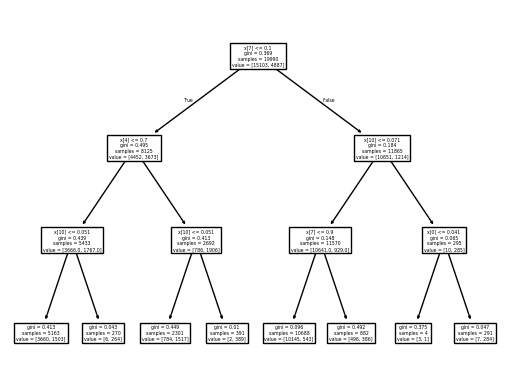

In [16]:
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
#Using  the Package of H2o for creating Decisiontree model

import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.frame import H2OFrame




In [75]:
h2o.init()
train_data_h2o=H2OFrame(train_data)
test_data_h2o=H2OFrame(test_data)

train_data_h2o

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 hour 51 mins
H2O_cluster_timezone:,Asia/Tehran
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 12 days
H2O_cluster_name:,H2O_from_python_USER_lvs0fw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,900 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0.315068,0.714286,0.143706,0.933333,0.933333,0.333333,0.692308,0,1,1,1,0,0.704082,0.948718,1
0.178082,0.428571,0.0929307,0.733333,0.533333,0,0.153846,0.2,1,0,0,0,0.397959,0.948718,0
0.39726,0.428571,0.0658263,1,0.6,0.333333,0,0,1,1,0,0,0.397959,0.948718,1
0.205479,0.428571,0.147567,0.533333,0.666667,0.333333,0.538462,0,1,1,0,0,0.602041,0.948718,1
0.506849,0.428571,0.0926176,0.866667,0,0.333333,0.692308,1,1,0,0,0,0.397959,0.615385,0
0.630137,0.428571,0.0676967,1,0.6,0.333333,0.692308,0,1,1,0,0,0.153061,0.948718,0
0.109589,0.428571,0.132836,0.333333,0.2,0.333333,0.384615,0,1,1,0,0,0.397959,0.615385,0
0.739726,0.142857,0.147258,0.733333,0.533333,1,0.230769,0.4,1,0,0,0,0.326531,0.948718,0
0.273973,0.428571,0.0369467,0.733333,0.533333,0.333333,0.384615,0,1,1,0,0,0.397959,0.948718,0
0.369863,0.428571,0.146096,0.533333,0.666667,0.333333,0.230769,0,0.5,1,0,0,0.397959,0.948718,0


In [ ]:
#training and evaluateing model(H2o_RandomForest)

train_data_h2o['income']=train_data_h2o['income'].asfactor()  #Changing type of  column'income' from numerical to categorical fromat(H2o) 

#split train_data_h2o
train, valid=train_data_h2o.split_frame(ratios=[0.8],seed=42)
x_features=train.columns[:-1]
y_target='income'

#creating Model
model=H2ORandomForestEstimator(ntrees=1,max_depth=10,mtries=-1,sample_rate=1,seed=42)
model.train(x=x_features,y='income',training_frame=train,validation_frame=valid)
model

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1739555898218_68


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    1                  1                           4391                   10           10           10            345           345           345

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
LogLoss: NaN
Mean Per-Class Error: NaN
AUC: NaN
AUCPR: NaN
Gini: NaN

ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.11012860747869678
RMSE: 0.3318563054677382
LogLoss: 0.5996675558042001
Mean Per-Class Error: 0.1929865309408172
AUC: 0.8882630116716377
AUCPR: 0.7356383793552753
Gini: 0.7765260233432754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.301369845867157
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      3006  692   0.1871   (692.0/3698.0)
1      241   971   0.1988   (241.0/1212.0)
Total  3247  1663  0.19     (933.0/4910.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.30137      0.675478  35
max f2                       0.142857     0.777184  55
max f0point5                 0.582734     0.705488  17
max accuracy                 0.582734     0.845214  17
max precision                0.882353     0.918455  4
max recall                   0            1         99
max specificity              1            0.995133  0
max absolute_mcc             0.212121     0.561482  41
max min_per_class_accuracy   0.30137      0.801155  35
max mean_per_class_accuracy  0.184211     0.815603  44
max tns                      1            3680      0
max fns                      1            1011      0
max fps                      0            3698      99
max tps                      0            1212      99
max tnr                      1            0.995133  0
max fnr                      1            0.834158  0
max fpr                      0            1         99
max tpr                      0            1         99

Gains/Lift Table: Avg response rate: 24.68 %, avg score: 24.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0446029                   1                  3.71818    3.71818            0.917808         1           0.917808                    1                   0.165842        0.165842                   271.818   271.818            0.160974
2        0.085947                    0.82069            3.39259    3.56156            0.837438         0.83033     0.879147                    0.918381            0.140264        0.306106                   239.259   256.156            0.292314
3        0.151731                    0.715363           2.72167    3.19742            0.671827         0.719841    0.789262                    0.832303            0.179043        0.485149                   172.167   219.742            0.442693
4        0.230957                    0.485661           1.94747    2.76865            0.48072          0.531833    0.683422                    0.729232            0.15429         0.639439                   94.747    176.865            0.542359
5    

In [ ]:
#checking model Performans for validation data
model_performance_valid=model.model_performance(valid)
model_performance_valid

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.11012860747869678
RMSE: 0.3318563054677382
LogLoss: 0.5996675558042001
Mean Per-Class Error: 0.1929865309408172
AUC: 0.8882630116716377
AUCPR: 0.7356383793552753
Gini: 0.7765260233432754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.301369845867157
       0     1     Error    Rate
-----  ----  ----  -------  --------------
0      3006  692   0.1871   (692.0/3698.0)
1      241   971   0.1988   (241.0/1212.0)
Total  3247  1663  0.19     (933.0/4910.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.30137      0.675478  35
max f2                       0.142857     0.777184  55
max f0point5                 0.582734     0.705488  17
max accuracy                 0.582734     0.845214  17
max precision                0.882353     0.918455  4
max recall                   0            1         99
max specificity              1            0.995133  0
max absolute_mcc             0.212121     0.561482  41
max min_per_class_accuracy   0.30137      0.801155  35
max mean_per_class_accuracy  0.184211     0.815603  44
max tns                      1            3680      0
max fns                      1            1011      0
max fps                      0            3698      99
max tps                      0            1212      99
max tnr                      1            0.995133  0
max fnr                      1            0.834158  0
max fpr                      0            1         99
max tpr                      0            1         99

Gains/Lift Table: Avg response rate: 24.68 %, avg score: 24.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0446029                   1                  3.71818    3.71818            0.917808         1           0.917808                    1                   0.165842        0.165842                   271.818   271.818            0.160974
2        0.085947                    0.82069            3.39259    3.56156            0.837438         0.83033     0.879147                    0.918381            0.140264        0.306106                   239.259   256.156            0.292314
3        0.151731                    0.715363           2.72167    3.19742            0.671827         0.719841    0.789262                    0.832303            0.179043        0.485149                   172.167   219.742            0.442693
4        0.230957                    0.485661           1.94747    2.76865            0.48072          0.531833    0.683422                    0.729232            0.15429         0.639439                   94.747    176.865            0.542359
5        0.329124                    0.351012           1.48766    2.38657            0.36722          0.373761    0.589109                    0.623206            0.14604         0.785479                   48.7665   138.657            0.605922
6        0.428717                    0.174964           0.985864   2.06118            0.243354         0.223899    0.508789                    0.530446            0.0981848       0.883663                   -1.41361  106.118            0.604053
7        0.502444                    0.0930232          0.64908    1.85397            0.160221         0.132331    0.457641                    0.472027            0.0478548       0.931518                   -35.092   85.3974            0.569701
8        0.601018         

In [ ]:
#checking model Performans for train data
model_performance_train=model.model_performance(train)
model_performance_train

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.0964418334332412
RMSE: 0.3105508548261318
LogLoss: 0.2985758810365306
Mean Per-Class Error: 0.1724293128775961
AUC: 0.9159518742666253
AUCPR: 0.7923453009377907
Gini: 0.8319037485332506

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35101187229156494
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      12754  2491  0.1634   (2491.0/15245.0)
1      877    3956  0.1815   (877.0/4833.0)
Total  13631  6447  0.1677   (3368.0/20078.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.351012     0.701418  32
max f2                       0.166667     0.79556   54
max f0point5                 0.6          0.737419  18
max accuracy                 0.55         0.859349  21
max precision                1            1         0
max recall                   0.00349039   1         100
max specificity              1            1         0
max absolute_mcc             0.413333     0.605348  30
max min_per_class_accuracy   0.303571     0.828264  36
max mean_per_class_accuracy  0.25         0.833523  40
max tns                      1            15245     0
max fns                      1            4031      0
max fps                      0            15245     101
max tps                      0.00349039   4833      100
max tnr                      1            1         0
max fnr                      1            0.834058  0
max fpr                      0            1         101
max tpr                      0.00349039   1         100

Gains/Lift Table: Avg response rate: 24.07 %, avg score: 24.07 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0399442                   1                  4.15436    4.15436            1                1           1                           1                   0.165942        0.165942                   315.436   315.436            0.165942
2        0.0408905                   0.947368           3.93571    4.1493             0.947368         0.947368    0.998782                    0.998782            0.00372439      0.169667                   293.571   314.93             0.169601
3        0.0833748                   0.82069            3.45303    3.79451            0.831184         0.831184    0.913381                    0.913381            0.1467          0.316367                   245.303   279.451            0.306855
4        0.140353                    0.715363           2.98867    3.46737            0.719406         0.719406    0.834634                    0.834634            0.170288        0.486654                   198.867   246.737            0.456087
5        0.150065                    0.666667           2.83348    3.42634            0.682051         0.682051    0.824759                    0.824759            0.0275191       0.514173                   183.348   242.634            0.479539
6        0.219544                    0.485661           2.10845    3.00927            0.507527         0.507527    0.724365                    0.724365            0.146493        0.660666                   110.845   200.927            0.580968
7        0.321098                    0.351012           1.55457    2.54919            0.374203         0.374203    0.613619                    0.613619            0.157873        0.818539                   55.4572   154.919            0.655141
8        

In [ ]:
#predication
prediction_t_h2o=model.predict(test_data_h2o)
prediction_t_h2o

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.825036,0.174964
0,0.855738,0.144262
1,0.514339,0.485661
0,0.935484,0.0645161
0,0.764706,0.235294
0,0.881553,0.118447
0,0.956284,0.0437158
1,0.696429,0.303571
1,0,1
1,0,1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [94]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['income.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['income.ipynb', 'submission.csv']


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>راهنمایی</b>
</font>
</h4>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ۱. توازن مجموعه‌داده را بررسی و مدیریت کنید.
    <br>
    ۲. برای مقادیر گم‌شده چه در هنگام آموزش و چه هنگام آزمون چاره‌ای بی‌اندیشید.
    <br>
    ۳. مقادیر گم‌شده ممکن است با عبارت دیگری به جز مقدار <code>NaN</code> نشان داده شده باشد.
    <br>
    ۴. ویژگی‌های دسته‌ای را به‌خوبی مدیریت کنید. توجه داشته باشید که ممکن است در هنگام آزمون با دسته‌ای مواجه شوید که در نمونه‌های آموزشی رخ نداده باشد.
    <br>
    ۵. برای تعیین حداکثر عمق درخت می‌توانید یکبار درخت را به شکل آزاد و کامل بسازید، سپس عمق آن را مشاهده کنید. سپس می‌توانید مقادیر کمتر از آن را برای حداکثر عمق آزمایش و تحلیل کنید.
    <br>
    ۶. برای ارزیابی مدل خود و کشف مدل بهتر می‌توانید بخشی از مجموعه‌داده را به عنوان مجموعه‌ی اعتبارسنجی جدا کنید یا اینکه از تکنیک‌های اعتبارسنجی متقاطع (cross-validation) و مانند آن کمک بگیرید.
</font>
</p>